## Importing required libraries

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

## Loading Data
Let's first load the required Heart Disease UCI dataset using pandas' read CSV function. 
Download: https://www.kaggle.com/ronitf/heart-disease-uci


* **age:** The person's age in years
* **sex:** The person's sex (1 = male, 0 = female)
* **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
* **chol:** The person's cholesterol measurement in mg/dl
* **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* **thalach:** The person's maximum heart rate achieved
* **exang:** Exercise induced angina (1 = yes; 0 = no)
* **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* **ca:** The number of major vessels (0-3)
* **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* **target:** Heart disease (0 = no, 1 = yes)

In [2]:
col_names = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
# load dataset
heart = pd.read_csv("heart.csv", header=0, names=col_names)

In [3]:
heart.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.groupby('target').count()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
target,,,,,,,,,,,,,
0,138,138,138,138,138,138,138,138,138,138,138,138,138
1,165,165,165,165,165,165,165,165,165,165,165,165,165


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null int64
chest_pain_type            303 non-null int64
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null int64
rest_ecg                   303 non-null int64
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null int64
st_depression              303 non-null float64
st_slope                   303 non-null int64
num_major_vessels          303 non-null int64
thalassemia                303 non-null int64
target                     303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [6]:
#split dataset in features and target variable
feature_cols = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
X = heart[feature_cols] # Features
y = heart.target # Target variable

## Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
print('train size is %i'%y_train.shape[0])
print('test size is %i'%y_test.shape[0])

train size is 212
test size is 91


## Building Decision Tree Model
Let's create a Decision Tree Model using Sk-learn.

In [9]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

In [10]:
heart_copy = heart

del heart_copy['target']

heart_copy.head()
#Predict the response for all dataset to compare results
heart_s_pred = classifier.predict(heart_copy)

heart_copy["tree"] = heart_s_pred
heart_copy.groupby('tree').count()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
tree,,,,,,,,,,,,,
0,148,148,148,148,148,148,148,148,148,148,148,148,148
1,155,155,155,155,155,155,155,155,155,155,155,155,155


## Create result file
Let's create a result csv file to use.

In [11]:
print(y_pred)

[0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0]


## Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

report=metrics.classification_report(y_test,y_pred)

clf_name=['Decision Tree Heart Disease','RegLog']

print('Reporting for %s:'%clf_name)

print(report)

Accuracy: 0.7362637362637363
Reporting for ['Decision Tree Heart Disease', 'RegLog']:
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



## Visualizing Decision Trees

C:\Users\carla\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


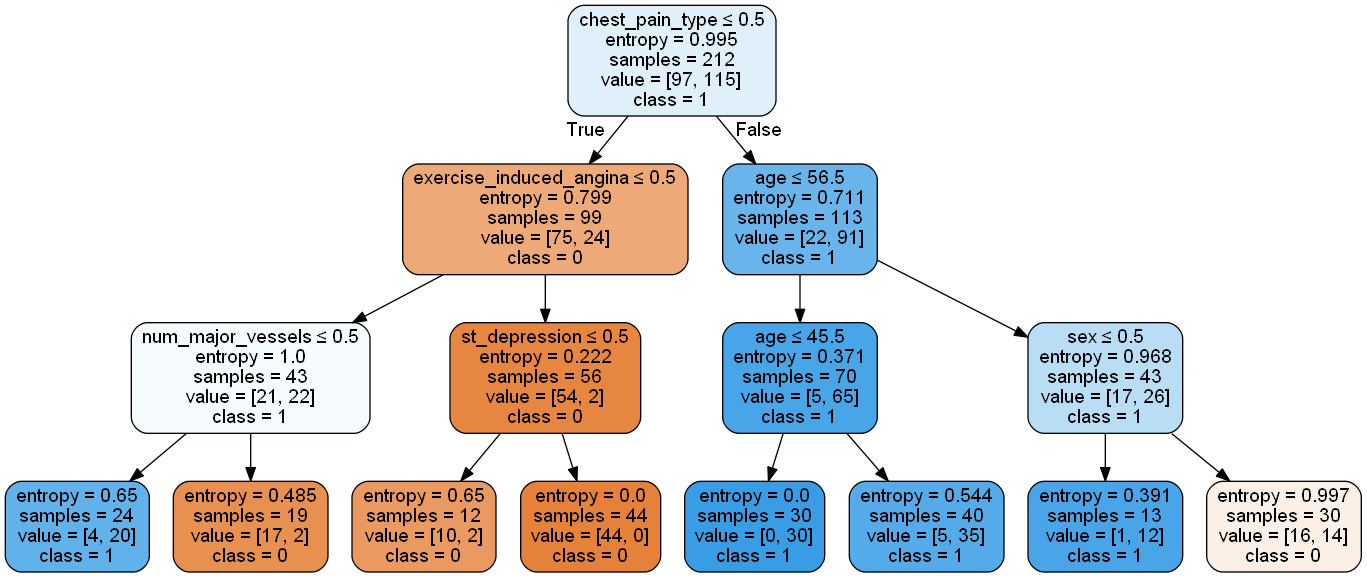

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())

## The explanation

Now let's see what the model gives us from the ML explainability tools.

Permutation importance is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy. Learn more here.

Let's take a look,

In [14]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

In [15]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0615 ± 0.0357,num_major_vessels
0.0418 ± 0.0839,chest_pain_type
0.0418 ± 0.0352,sex
0.0374 ± 0.0357,age
0 ± 0.0000,thalassemia
0 ± 0.0000,st_slope
0 ± 0.0000,st_depression
0 ± 0.0000,max_heart_rate_achieved
0 ± 0.0000,rest_ecg
0 ± 0.0000,fasting_blood_sugar


This model is less complex, explainable and easy to understand.



## Pros
* Decision trees are easy to interpret and visualize.
* It can easily capture Non-linear patterns.
* It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
* It can be used for feature engineering such as predicting missing values, suitable for variable selection.

## Cons
* Sensitive to noisy data. It can overfit noisy data.
* The small variation(or variance) in data can result in the different decision tree. This can be reduced by bagging and boosting algorithms.
* Decision trees are biased with imbalance dataset, so it is recommended that balance out the dataset before creating the decision tree.